In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
df=pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [42]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [43]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [44]:
df.shape

(6435, 8)

# DATA Preprocessing

In [45]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### The data doesn't contain na values

In [46]:
df.duplicated().sum()

0

### Data doesn't contain any duplicated values

In [47]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [49]:
data = df.drop('Date', axis=1)

#### Converting Temperature to degree Celcius (C)

In [50]:
data.Temperature = round((data.Temperature-32)/1.8, 2)

## Visualization

C:\Users\Abhishek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



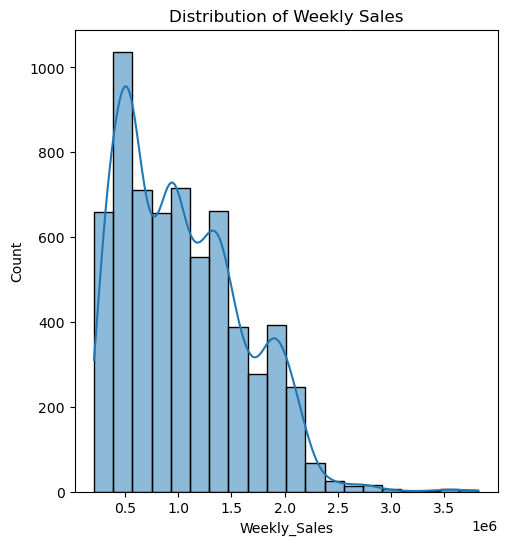

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Weekly_Sales'], bins=20, kde=True)
plt.title('Distribution of Weekly Sales');

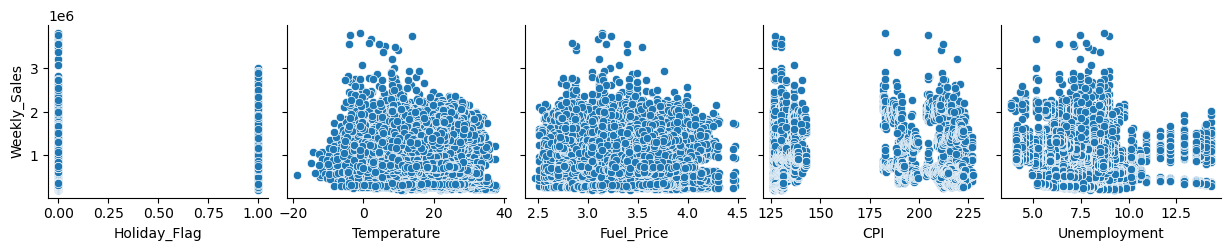

In [52]:
sns.pairplot(data, x_vars=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 
             y_vars=['Weekly_Sales'], kind='scatter')

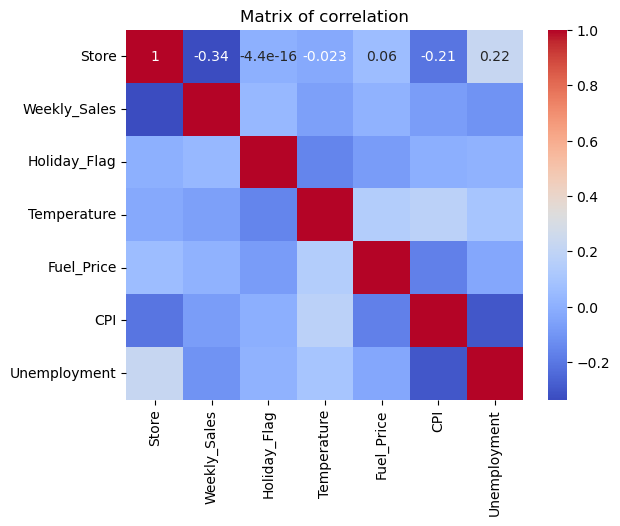

In [53]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix of correlation');

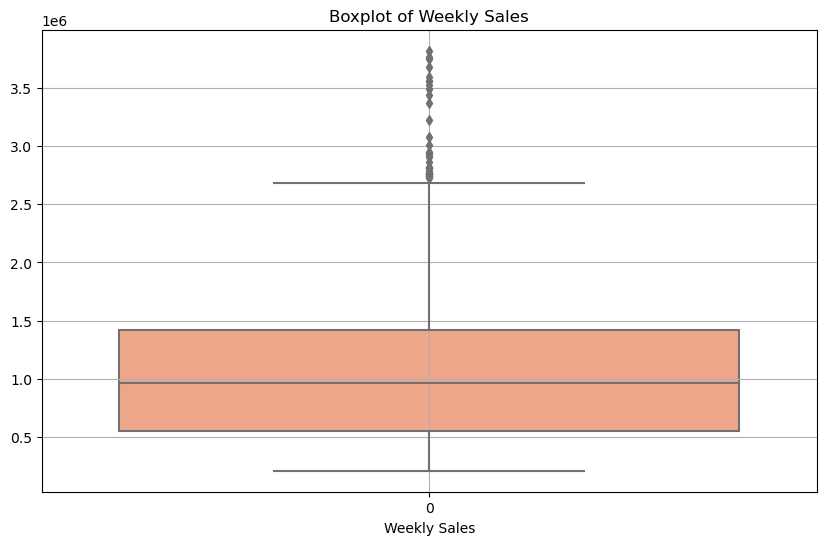

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['Weekly_Sales'], color='lightsalmon')
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.grid(True)

#### Now We find the boundaries of emissions. We calculate quartiles (Q1 and Q3) and interquartile range (IQR) for the "Weekly_Sales" column.

In [55]:
Q1 = data['Weekly_Sales'].quantile(0.25) # 25th quartile
Q3 = data['Weekly_Sales'].quantile(0.75) # 75th quartile

IQR = Q3 - Q1      # Interquartile range

lower_bound = Q1 - 1.5 * IQR  # Lower emission limit
upper_bound = Q3 + 1.5 * IQR  # Upper emission limit

#### Next, we filter the source data, leaving only those rows where the values of the "Weekly_Sales" column are within certain outlier boundaries.

In [66]:
cleaned_data = data[(data['Weekly_Sales'] >= lower_bound) & (data['Weekly_Sales'] <= upper_bound)]

In [73]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,5.73,2.572,211.096358,8.106
1,1,1641957.44,1,3.62,2.548,211.242170,8.106
2,1,1611968.17,0,4.41,2.514,211.289143,8.106
3,1,1409727.59,0,8.13,2.561,211.319643,8.106
4,1,1554806.68,0,8.06,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,18.27,3.997,192.013558,8.684
6431,45,733455.07,0,18.27,3.985,192.170412,8.667
6432,45,734464.36,0,12.48,4.000,192.327265,8.667
6433,45,718125.53,0,13.59,3.969,192.330854,8.667


### Dividing the data into train and test sets for other regressions

In [69]:
X=data.iloc[:, 2:7] 
Y=data.iloc[:,1:2] 

In [71]:
X

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,5.73,2.572,211.096358,8.106
1,1,3.62,2.548,211.242170,8.106
2,0,4.41,2.514,211.289143,8.106
3,0,8.13,2.561,211.319643,8.106
4,0,8.06,2.625,211.350143,8.106
...,...,...,...,...,...
6430,0,18.27,3.997,192.013558,8.684
6431,0,18.27,3.985,192.170412,8.667
6432,0,12.48,4.000,192.327265,8.667
6433,0,13.59,3.969,192.330854,8.667


In [74]:
Y

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68
...,...
6430,713173.95
6431,733455.07
6432,734464.36
6433,718125.53


## Multilinear Regression

In [75]:
# Dataset Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

In [76]:
# feature scalling ---Standization
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [77]:
# MLR Model creation --- Model Training
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression()

In [78]:
# Prediction 
Y_pred=mlr.predict(X_test)
Y_pred

array([[ 915782.64452364],
       [ 985741.72148431],
       [1079990.4893032 ],
       ...,
       [1003269.84574901],
       [1047134.31049777],
       [1043402.19617939]])

In [79]:
# Ecaluate the perfromance of the model---r2_score
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)*100

3.3890449831439295

## Polynomial Regression

In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat=PolynomialFeatures(degree=4)
X_poly=poly_feat.fit_transform(X)
X_poly

array([[1.00000000e+00, 0.00000000e+00, 5.73000000e+00, ...,
        2.92802433e+06, 1.12434745e+05, 4.31744086e+03],
       [1.00000000e+00, 1.00000000e+00, 3.62000000e+00, ...,
        2.93207070e+06, 1.12512408e+05, 4.31744086e+03],
       [1.00000000e+00, 0.00000000e+00, 4.41000000e+00, ...,
        2.93337483e+06, 1.12537427e+05, 4.31744086e+03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.24800000e+01, ...,
        2.77855697e+06, 1.25212373e+05, 5.64254701e+03],
       [1.00000000e+00, 0.00000000e+00, 1.35900000e+01, ...,
        2.77866067e+06, 1.25214709e+05, 5.64254701e+03],
       [1.00000000e+00, 0.00000000e+00, 1.49200000e+01, ...,
        2.77802632e+06, 1.25200416e+05, 5.64254701e+03]])

In [81]:
# Dataset Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X_poly,Y, test_size=0.2, random_state=0)

In [82]:
# Create the mode----Poly Regr
from sklearn.linear_model import LinearRegression
poly_reg=LinearRegression()
poly_reg.fit(X_train, Y_train)

LinearRegression()

In [83]:
Y_pred_2=poly_reg.predict(X_test)
Y_pred_2

array([[ 741575.61812779],
       [1370930.04979679],
       [ 638665.96062431],
       ...,
       [1194337.31937358],
       [1175247.13779888],
       [1138210.82576904]])

In [84]:
#  Evaluate the perfromance of the model---r2_score
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred_2)*100

15.296824200045789

### Decision Tree

In [85]:
# Dataset splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=9)

In [86]:
# Model Training
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

DecisionTreeRegressor()

In [87]:
# Prediction --Testing
Y_pred=dtr.predict(X_test)

### Dividing the data into train and test sets

In [57]:
X_cleaned = cleaned_data.drop('Weekly_Sales', axis=1)
y_cleaned = cleaned_data['Weekly_Sales']

In [58]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned,test_size=0.1, random_state=101)

### Feature Scaling

In [59]:
scaler_cleaned = StandardScaler()
X_train_scaled_cleaned = scaler_cleaned.fit_transform(X_train_cleaned)
X_test_scaled_cleaned = scaler_cleaned.transform(X_test_cleaned)

### Random Forest

In [60]:
forest_model_cleaned = RandomForestRegressor(random_state=101)

In [61]:
forest_model_cleaned.fit(X_train_scaled_cleaned, y_train_cleaned)

RandomForestRegressor(random_state=101)

In [62]:
y_pred_cleaned = forest_model_cleaned.predict(X_test_scaled_cleaned)

### Model Evaluation

In [63]:
MAE = mean_absolute_error(y_test_cleaned, y_pred_cleaned)

In [64]:
RMSE = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))

In [65]:
print(MAE)
print(RMSE)
np.mean(data['Weekly_Sales'])

67383.76120249611
117436.66137498885


1046964.8775617715